#### Pavlo Yatluk
#### dz_57

### ЗАВДАННЯ

#### Можна використовувати бібліотеку PIL або openCV   1. Створіть функцію для зчитування зображення з диску та його відображення на екрані. 2. Створіть функцію для збереження зображення на диск.  3. Створіть функції для реалізації наступних піксельних операцій:    - зміна контрастності (задання коефіцієнту контрастності та яскравості);   - зміна яскравості (задання коефіцієнту яскравості);   - зміна насиченості (задання коефіцієнту насиченості);  - зміна розміру зображення (задання нової широти та висоти);   - обрізання зображення (задання координат початку та кінця обрізання);   - поворот зображення на заданий кут (задання кута повороту в градусах).

In [1]:
# імпорт бібліотек
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. Створіть функцію для зчитування зображення з диску та його відображення на екрані

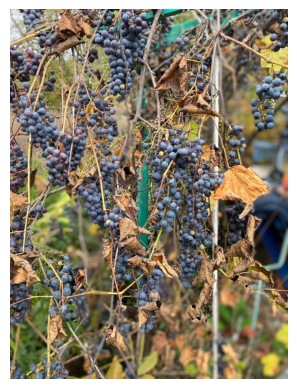

In [7]:
# зчитування зобрадження, завантаження  та відображення на екрані в RGB
def load(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.show
file =  'C:\projects sta\pythonProject\dz_57\dacha.jpg'
load(file)

#### 2. Створіть функцію для збереження зображення на диск.

In [8]:
def writing(img):
    cv2.imwrite('C:\projects sta\pythonProject\dz_57\dacha.jpg', img)
    return 'Writing complete'

#### 3. Створіть функції для реалізації наступних піксельних операцій: - зміна контрастності (задання коефіцієнту контрастності та яскравості);



In [ ]:

def contrast_brightness(img):
    x=float(input('Коефіціент корекції контрастності [0:3]: '))
    y=float(input('Коефіціент корекції яркості зображення [-200:200]: '))
    return img*x+y  
img = cv2.imread('C:\projects sta\pythonProject\dz_57\dacha.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

contrast_brightness(img)



array([[[ 73,  69,  66],
        [101,  98,  96],
        [150, 147, 145],
        ...,
        [ 72,  78,  83],
        [ 76,  80,  91],
        [ 77,  81,  92]],

       [[ 74,  69,  69],
        [107, 104, 102],
        [154, 150, 151],
        ...,
        [ 62,  67,  74],
        [ 73,  77,  87],
        [ 80,  85,  94]],

       [[ 79,  74,  76],
        [109, 105, 106],
        [158, 154, 157],
        ...,
        [ 62,  66,  72],
        [ 67,  72,  77],
        [ 72,  78,  83]],

       ...,

       [[255, 255, 183],
        [255, 243, 172],
        [204, 178, 121],
        ...,
        [184, 189, 185],
        [180, 185, 179],
        [175, 181, 175]],

       [[255, 249, 177],
        [226, 202, 140],
        [132, 112,  62],
        ...,
        [186, 191, 187],
        [182, 187, 181],
        [177, 183, 177]],

       [[208, 187, 123],
        [116,  95,  37],
        [ 84,  67,  15],
        ...,
        [187, 192, 188],
        [183, 188, 182],
        [180, 185, 179]]

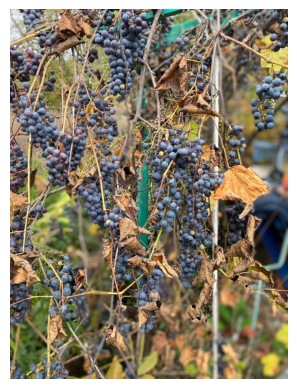

In [23]:
# Функція автоматичного контрастування
def auto_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  
    l, a, b = cv2.split(lab)  
    l2 = clahe.apply(l)  
    lab = cv2.merge((l2,a,b)) 
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR) 
plt.axis('off')
plt.imshow(img)
plt.show
auto_contrast(img)


In [11]:
# Функція зміни кольорової насиченості зображення
def saturation(img):
    x=float(input('Введіть коефіціент зміни кольорової насиченості зображення [0:5] : '))
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * x
    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

In [12]:
#  Функція обрізання фотографії
def cropped(img):
    size=img.shape
    print('Розмір зображення ', size[0],'x',size[1])
    x1=int(input('Введіть координату х1 : '))
    y1=int(input('Введіть координату y1 : '))
    x2=int(input('Введіть координату х2 : '))
    y2=int(input('Введіть координату y2 : '))
    return img[x1:x2,y1:y2]


In [13]:
# Функція зміни розміру фотографії
def resize(img):
    size=img.shape
    print('Розмір оригінального зображення ', size[0],'x',size[1])
    x=float(input('Введіть коефіціент перетворення розміру зображення : '))
    width = int(size[1] * x)
    height = int(size[0] * x)
    print('Розмір зображення після перетворення ',width,'x',height)
    dim = (width, height)
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
# Функція повороту зображення
def rotation(img):
    angl=int(input('Введіть кут повороту зображення у градусах : '))
    size = img.shape
    center = (size[1] // 2, size[0] // 2)
    new_img=cv2.getRotationMatrix2D(center, angl, 1.0)
    rotated = cv2.warpAffine(img, new_img, (size[1], size[0]))
    return rotated
rotation(img)  